In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import read_csv
sns.set_style('white')
sns.set_context('notebook', font_scale=1.75)
%matplotlib inline

data = read_csv('moodRL_data.csv')
metadata = read_csv('moodRL_metadata.csv')
ratings = read_csv('moodRL_ratings.csv')

## Sanity Checks

### Learning

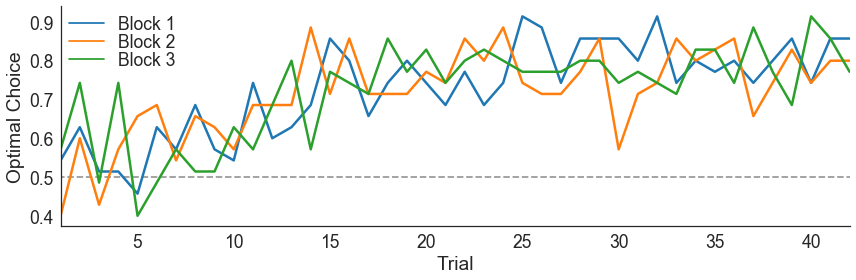

In [2]:
df = data[data.Block<4].copy()
df['Optimal'] = df.Choice == df[['M1','M2']].max(axis=1)
df.Block = ['Block %s' %s for s in df.Block]

fig, ax = plt.subplots(1,1,figsize=(12,4))
sns.lineplot('Trial', 'Optimal', 'Block', data=df, ci=None, lw=2.5, ax=ax)
ax.hlines(0.5, *ax.get_xlim(), linestyle='--', alpha=0.4)
ax.set(xlim=(1,42), ylabel='Optimal Choice')
ax.legend(loc=2, labelspacing=0, borderpad=0)

sns.despine()
plt.tight_layout()

### Subjective estimates of likelihood of win

/Users/szoro/Documents/software/anaconda3.6/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/szoro/Documents/software/anaconda3.6/lib/python3.6/site-packages/seaborn/axisgrid.py:708: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


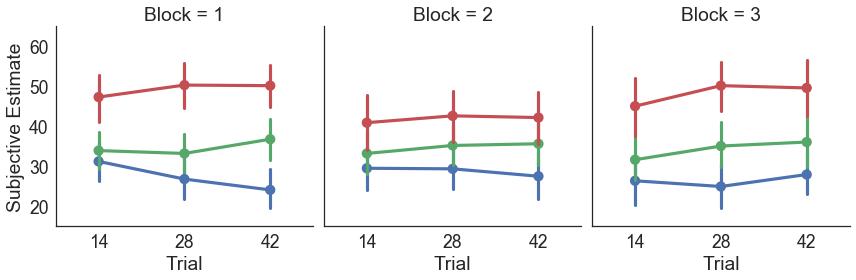

In [3]:
g = sns.FacetGrid(ratings[ratings.Variable!='Mood'], col='Block', size=4)
g.map(sns.pointplot, 'Trial', 'Rating', 'Variable', palette=['#4c72b0', '#55a868', '#c44e52'])
g.axes[0,0].set(ylim=(15,65), ylabel='Subjective Estimate');

### Wheel of fortune mood manipulation

/Users/szoro/Documents/software/anaconda3.6/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/szoro/Documents/software/anaconda3.6/lib/python3.6/site-packages/seaborn/axisgrid.py:708: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


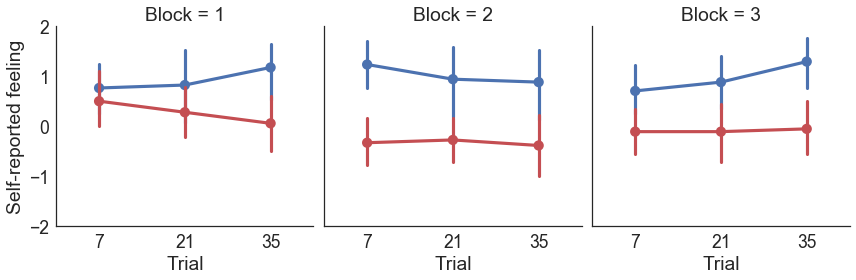

In [4]:
df = ratings.merge(metadata[['Subject','Datetime','WoF']], on=['Subject','Datetime'])
df['Outcome'] = np.where(df.WoF > 0, 'Win', 'Loss')
g = sns.FacetGrid(df[df.Variable=='Mood'], col='Block', size=4)
g.map(sns.pointplot, 'Trial', 'Rating', 'Outcome', palette=['#4c72b0', '#c44e52'])
g.axes[0,0].set(ylim=(-2,2), ylabel='Self-reported feeling');

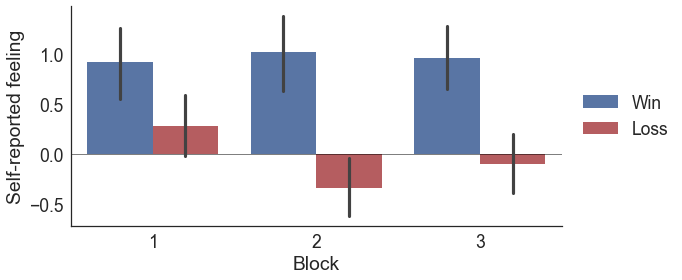

In [5]:
## Plot.
fig, ax = plt.subplots(1,1,figsize=(8,4))
sns.barplot('Block', 'Rating', 'Outcome', data=df[df.Variable=='Mood'], 
            palette=['#4c72b0', '#c44e52'], ax=ax)

## Add info.
ax.set(ylabel='Self-reported feeling')
ax.hlines(0,*ax.get_xlim(),lw=0.5)
ax.legend(loc=7, bbox_to_anchor=(1.25,0.5))

sns.despine()
plt.tight_layout()